<a href="https://colab.research.google.com/github/OliverCode-maker/ProyectoPOO_P5_G9/blob/master/PROYECTO_AL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementación de librerías

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
import sklearn.datasets
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from google.colab import drive

Carga y exploración inicial del dataset

In [2]:
# Cargar el Dataset
drive.mount('/content/drive')
ruta='/content/drive/My Drive/HousingData.csv'
df1=pd.read_csv(ruta)
# Preparación del Dataset
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df1), columns=df1.columns)

print("Conjunto de datos Boston Housing tiene {} filas y {} columnas\n".format(*df1.shape))
print("Se visualizan las primeras 5 filas:\n\n{}".format(df1.head(5)))
print("Algunas estadísticas básicas del conjunto de datos Iris:\n\n{}".format(df1.describe()))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Conjunto de datos Boston Housing tiene 506 filas y 14 columnas

Se visualizan las primeras 5 filas:

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  
Algunas estadísticas básicas del conjunto de datos Iris:

             CRIM          ZN       INDUS        CHAS         NOX          RM  \


Aplicación de la SVD al dataset Boston Housing

In [3]:
U_bh, S_bh, Vt_bh = np.linalg.svd(df_imputed, full_matrices=False)

Visualización inicial de la matriz U

In [4]:
componentes = ["PC1", "PC2", "PC3", "PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13","PC14"]
print("Matriz U tiene {} filas y {} columnas\n".format(*U_bh.shape))
print("Se visualizan las primeras 5 filas:")
print(pd.DataFrame(U_bh, columns=componentes).head(5))

Matriz U tiene 506 filas y 14 columnas

Se visualizan las primeras 5 filas:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.038513 -0.035777 -0.005706  0.016976 -0.004678 -0.002719  0.055417   
1 -0.035339 -0.045092 -0.050545  0.009567  0.002479  0.002721  0.020991   
2 -0.034993 -0.044512 -0.026536 -0.010857 -0.063799  0.027646 -0.004596   
3 -0.033698 -0.048655 -0.010309 -0.031599 -0.059758  0.035441 -0.005282   
4 -0.033920 -0.049107 -0.021866 -0.017574 -0.053764  0.035516 -0.071916   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  
0 -0.020646  0.074355  0.039685  0.011974 -0.046554 -0.002059  0.044405  
1 -0.012177  0.031376 -0.026759 -0.045047 -0.011819 -0.012683 -0.021005  
2  0.007345  0.027828 -0.016913 -0.038667 -0.000348 -0.024561 -0.013595  
3 -0.037030  0.039189 -0.033683 -0.035246  0.010940 -0.014951  0.023503  
4 -0.069039  0.000417  0.020223 -0.046815  0.023287 -0.024122 -0.014302  


Interpretación de las componentes principales mediante la matriz Vt

In [5]:
columnas_bh = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]

print("Matriz Vᵗ tiene {} filas y {} columnas\n".format(*Vt_bh.shape))

# Mostrar Vᵗ con nombres de variables originales como columnas
print(pd.DataFrame(Vt_bh, columns=columnas_bh))

Matriz Vᵗ tiene 14 filas y 14 columnas

        CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0  -0.007770 -0.017239 -0.020951 -0.000121 -0.000993 -0.010903 -0.124290   
1   0.028350 -0.055075  0.019214 -0.000135 -0.000006 -0.006810  0.024524   
2  -0.011892  0.605220 -0.082745 -0.000837 -0.002003  0.001729 -0.774095   
3   0.013000  0.768475 -0.019990  0.000794  0.001899  0.032272  0.603229   
4   0.276226  0.169743  0.038344 -0.004838 -0.001677 -0.076199  0.005138   
5   0.930322 -0.048230 -0.114912  0.000962 -0.000249  0.019544 -0.012132   
6  -0.055315  0.039298 -0.231657 -0.000444 -0.008132 -0.099942  0.137854   
7   0.169180  0.048795  0.848162  0.004480  0.002539 -0.032524 -0.026105   
8   0.156299 -0.053568 -0.361049 -0.012642 -0.000305  0.083894  0.019939   
9   0.025645 -0.024924 -0.250059  0.004199 -0.003747 -0.129087 -0.010265   
10 -0.013390  0.035540 -0.106076 -0.007532  0.003041 -0.089945 -0.019049   
11  0.008680  0.002610  0.001466  0.005983 -0.04

Determinación de la varianza explicada acumulada por cada valor singular

In [6]:
num_sv_bh = np.arange(1, S_bh.size + 1)

cum_var_explained_bh = [
  np.sum(np.square(S_bh[0:n])) / np.sum(np.square(S_bh))
  for n in num_sv_bh
]

Presentación de gráfico combinado de valores singulares y varianza explicada

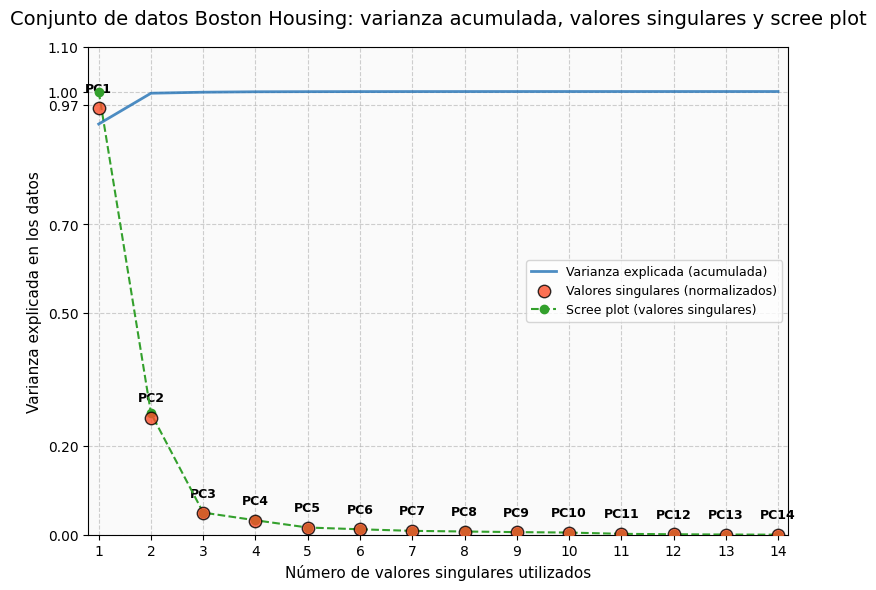

In [7]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

  # Línea: Varianza acumulada explicada
ax.plot(
  num_sv_bh,
  cum_var_explained_bh,
  color="#2171b5",
  label="Varianza explicada (acumulada)",
  alpha=0.8,
  linewidth=2,
  zorder=1000
)

# Puntos: valores singulares normalizados
ax.scatter(
  num_sv_bh,
  sklearn.preprocessing.normalize(S_bh.reshape((1, -1))).flatten(),
  color="#fc4e2a",
  label="Valores singulares (normalizados)",
  alpha=0.8,
  s=80,
  edgecolors='black',
  zorder=1001
)

# Línea discontinua: Scree Plot (valores singulares no normalizados)
ax.plot(
  num_sv_bh,
  S_bh / S_bh.max(), # Escalado para compatibilidad visual
  color="#33a02c",
  linestyle="--",
  marker="o",
  linewidth=1.5,
  label="Scree plot (valores singulares)",
  zorder=999
)

# Etiquetas en puntos singulares para indicar componente
for i, (x, y) in enumerate(zip(num_sv_bh, sklearn.preprocessing.normalize(S_bh.reshape((1, -1))).flatten())):
  ax.text(x, y + 0.03, f"PC{i+1}", ha='center', va='bottom', fontsize=9, fontweight='bold')

# Etiquetas de ejes y título
ax.set_xticks(num_sv_bh)
ax.set_yticks([0.0, 0.2, 0.5, 0.7, 0.97, 1.0, 1.1])
ax.set_xlim(0.8, 14.2)
ax.set_ylim(0.0, 1.1)
ax.set_xlabel("Número de valores singulares utilizados", fontsize=11)
ax.set_ylabel("Varianza explicada en los datos", fontsize=11)
ax.set_title(
  "Conjunto de datos Boston Housing: varianza acumulada, valores singulares y scree plot",
  fontsize=14,
  y=1.03
)

# Fondo, leyenda y grilla
ax.set_facecolor("0.98")
ax.legend(loc="center right", scatterpoints=1, fontsize=9)
ax.grid(alpha=0.6, linestyle="--", zorder=1)

plt.tight_layout()
plt.show()